# **Predictive Model**

In [ ]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#get current working directory

cwd = os.getcwd()

#read the csv

df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0


In [ ]:
df.shape

(33064, 14)

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,33064.000000,33064.000000,33064.000000,33064.000000,33063.000000,33063.000000,33063.000000,33063.000000,33063.000000
mean,1.471691,81.155002,32.109969,8.953182,0.710734,0.302060,0.455827,7.499198,0.123794
std,0.881262,85.790123,38.649047,5.448862,0.453428,0.459158,0.498052,1.484426,0.329351
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,20.000000,17.000000,5.000000,0.000000,0.000000,0.000000,6.330000,0.000000
50%,1.000000,50.000000,23.000000,9.000000,1.000000,0.000000,0.000000,8.580000,0.000000
75%,2.000000,111.000000,35.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,704.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33064 entries, 0 to 33063
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         33064 non-null  int64  
 1   sales_channel          33064 non-null  object 
 2   trip_type              33064 non-null  object 
 3   purchase_lead          33064 non-null  int64  
 4   length_of_stay         33064 non-null  int64  
 5   flight_hour            33064 non-null  int64  
 6   flight_day             33064 non-null  object 
 7   route                  33064 non-null  object 
 8   booking_origin         33064 non-null  object 
 9   wants_extra_baggage    33063 non-null  float64
 10  wants_preferred_seat   33063 non-null  float64
 11  wants_in_flight_meals  33063 non-null  float64
 12  flight_duration        33063 non-null  float64
 13  booking_complete       33063 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 3.5+ 

In [ ]:

per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

In [ ]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 90.4488265182676 %
Number of bookings done through phone call: 9.551173481732397 %


In [ ]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [ ]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.79324945560126 %
Percentage of One way trips: 0.9647955480280668 %
Percentage of circle trips: 0.24195499637067508 %


<Axes: xlabel='purchase_lead', ylabel='Count'>

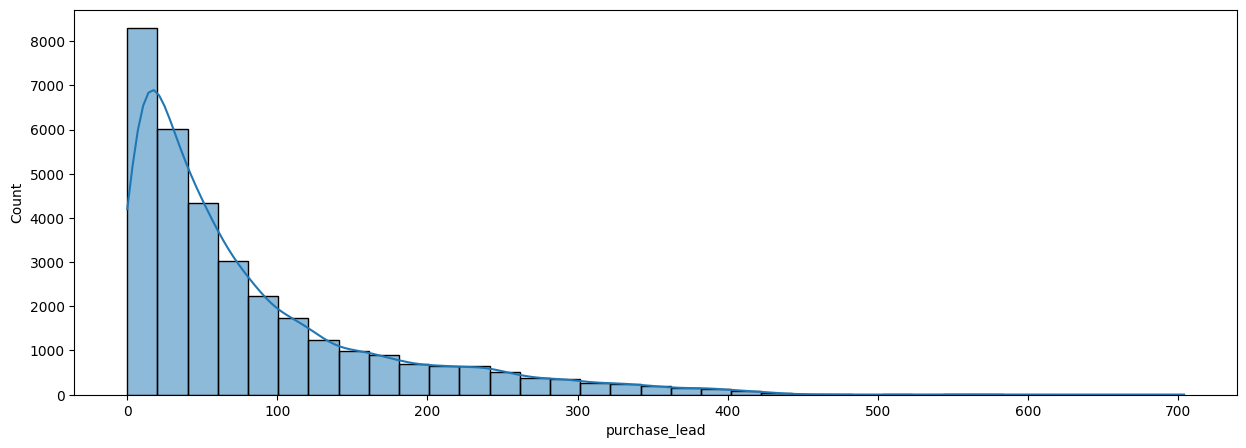

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

In [ ]:
(df.purchase_lead >600).value_counts()

purchase_lead
False    33061
True         3
Name: count, dtype: int64

In [ ]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1.0,0.0,1.0,8.83,1.0
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0.0,0.0,0.0,8.83,0.0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0.0,0.0,0.0,8.58,0.0


In [ ]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]

<Axes: xlabel='length_of_stay', ylabel='Count'>

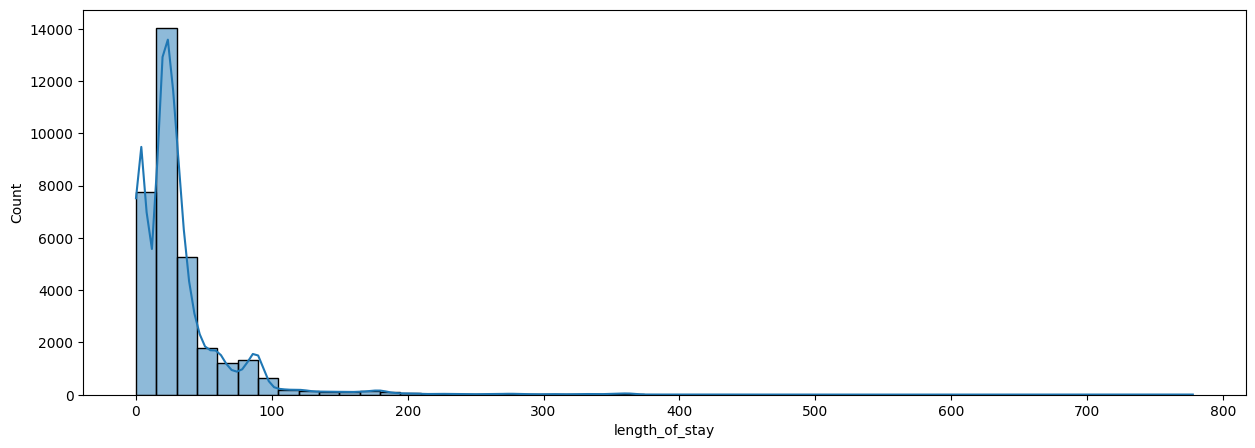

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

In [ ]:
(df.length_of_stay> 200).value_counts()

length_of_stay
False    32782
True       279
Name: count, dtype: int64

In [ ]:
df[df.length_of_stay> 500].booking_complete.value_counts()

booking_complete
0.0    9
1.0    1
Name: count, dtype: int64

In [ ]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

In [ ]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [ ]:
df.flight_day.value_counts()

flight_day
1    5319
3    5146
2    5048
4    4975
5    4467
7    4262
6    3835
Name: count, dtype: int64

Text(0, 0.5, 'Number of bookings')

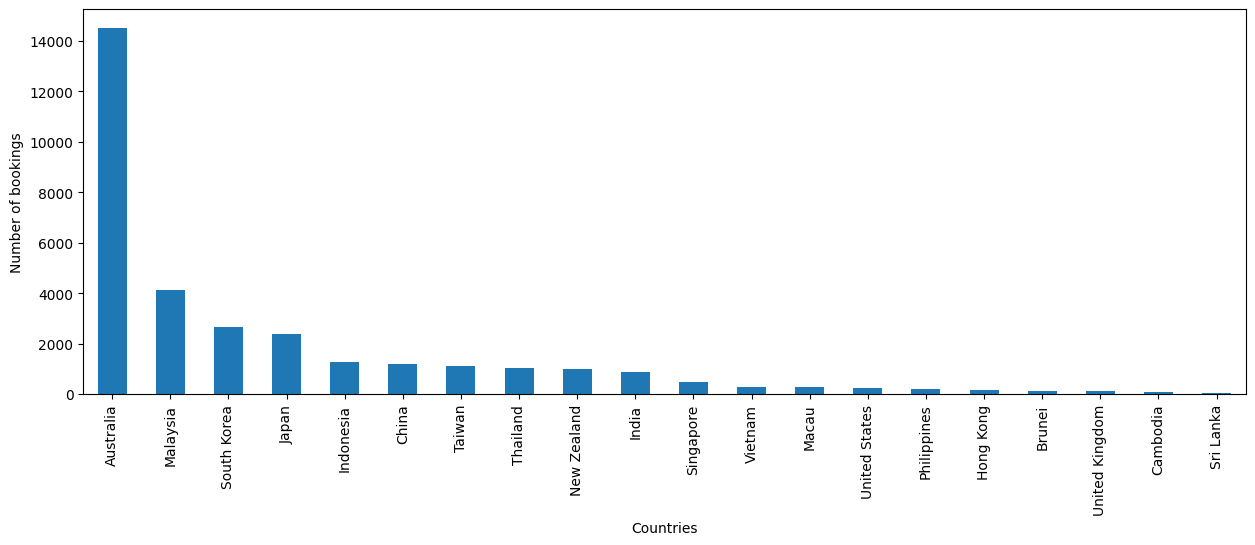

In [ ]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

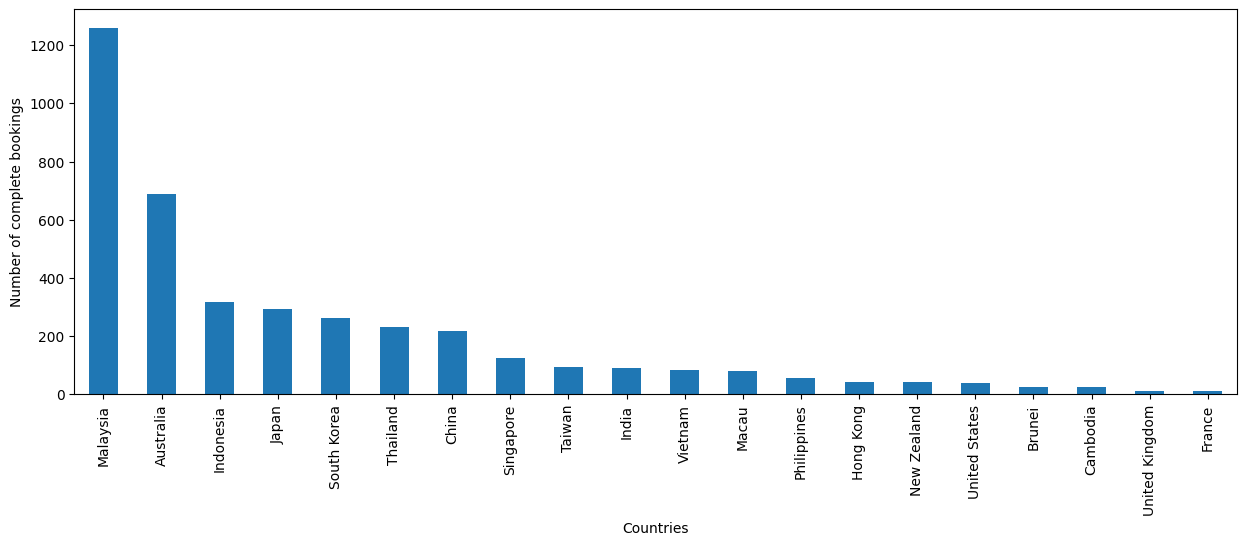

In [ ]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [ ]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [ ]:
unsuccessful_booking_per = 100-successful_booking_per

In [ ]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 12.38 % bookings were successfull or complete.


In [ ]:
df.to_csv(cwd + "/filtered_customer_booking.csv")

**Predictive Model**

In [ ]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})


In [ ]:
# get current working directory
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [ ]:
df = df.reset_index(drop=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1.0,0.0,1.0,5.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33047,2,Internet,RoundTrip,191,4,14,3,ICNSYD,South Korea,0.0,1.0,1.0,8.58,0.0
33048,1,Internet,RoundTrip,4,4,1,3,ICNSYD,South Korea,1.0,1.0,1.0,8.58,0.0
33049,1,Internet,RoundTrip,63,4,9,3,ICNSYD,Hong Kong,0.0,0.0,0.0,8.58,0.0
33050,6,Internet,RoundTrip,150,4,11,1,ICNSYD,South Korea,1.0,1.0,1.0,8.58,0.0


In [ ]:
df_final = df

In [ ]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [ ]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [ ]:
#store the label for supervised learning
label = df['booking_complete']

In [ ]:
df_final = df_final.drop('booking_complete', axis=1)

In [ ]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1.0,0.0,0.0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0.0,0.0,0.0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1.0,1.0,0.0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0.0,0.0,1.0,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1.0,0.0,1.0,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33047,2,191,4,14,3,0.0,1.0,1.0,8.58,1.0,0.0,0.0,0.0,1.0
33048,1,4,4,1,3,1.0,1.0,1.0,8.58,1.0,0.0,0.0,0.0,1.0
33049,1,63,4,9,3,0.0,0.0,0.0,8.58,1.0,0.0,0.0,0.0,1.0
33050,6,150,4,11,1,1.0,1.0,1.0,8.58,1.0,0.0,0.0,0.0,1.0


Normalizaing the values

In [ ]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [ ]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [ ]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [ ]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.599706,2.122815,-0.339247,-0.358276,1.103427,0.637844,-0.657990,-0.915370,-1.333036,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
1,-0.535090,0.363820,-0.313377,-1.092421,1.103427,-1.567782,-0.657990,-0.915370,-1.333036,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
2,0.599706,1.900009,-0.261636,1.477084,-0.408198,0.637844,1.519781,-0.915370,-1.333036,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
3,-0.535090,0.176194,-0.028803,-0.908884,1.103427,-1.567782,-0.657990,1.092454,-1.333036,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
4,0.599706,-0.152151,-0.261636,1.110012,-0.408198,0.637844,-0.657990,1.092454,-1.333036,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33047,0.599706,1.290224,-0.727303,0.926476,-0.408198,-1.567782,1.519781,1.092454,0.728316,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
33048,-0.535090,-0.902656,-0.727303,-1.459493,-0.408198,0.637844,1.519781,1.092454,0.728316,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
33049,-0.535090,-0.210784,-0.727303,0.008796,-0.408198,-1.567782,-0.657990,-0.915370,0.728316,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
33050,5.138892,0.809432,-0.727303,0.375868,-1.415948,0.637844,1.519781,1.092454,0.728316,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0


**Correlation matrix**

Text(0.5, 1.0, 'Correlation Heatmap')

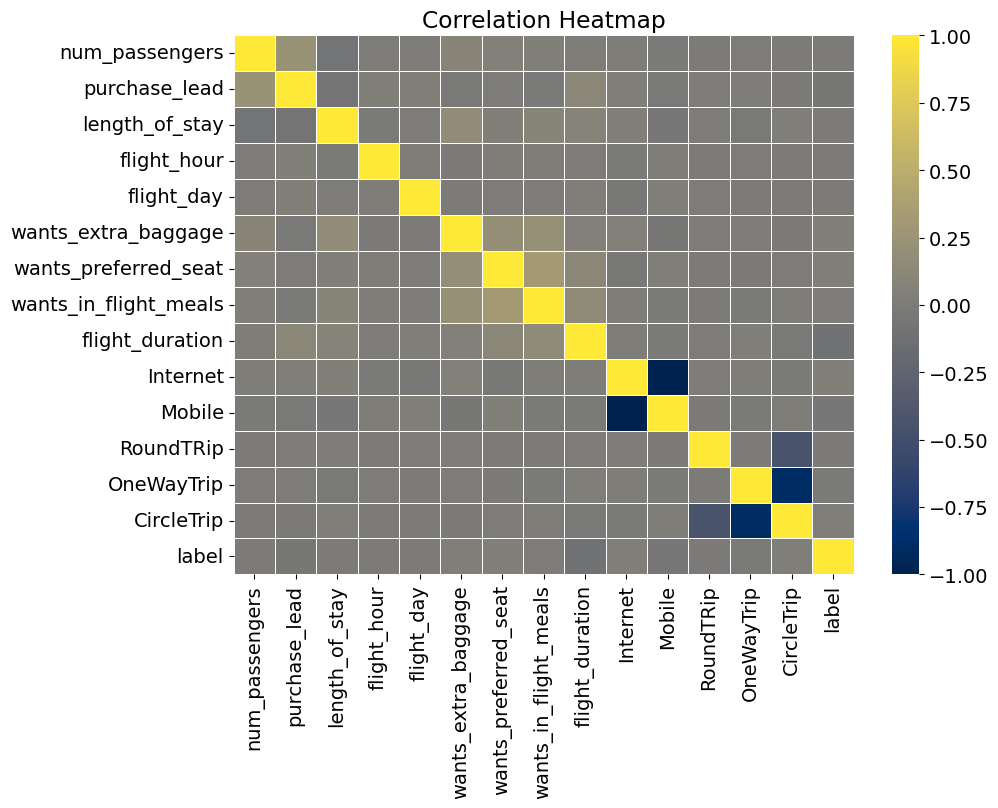

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = scaled_df.corr()

# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap with a new color map
sns.heatmap(corr, cmap='cividis', linewidths=.5, cbar=True)

# Add title
plt.title('Correlation Heatmap')

In [ ]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [ ]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [ ]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier( max_depth =50 , min_samples_split  =5, random_state=0)

In [ ]:
# Identify rows with NaN values in y_train
nan_indices = np.isnan(y_train)

# Drop rows with NaN values from X_train_imputed and y_train
X_train_clean = X_train_imputed[~nan_indices]
y_train_clean = y_train[~nan_indices]

# Now, train your model with X_train_clean and y_train_clean
y_pred_train = model_fit_predict(clf_rf, X_train_clean, y_train_clean, X_train_clean)

In [ ]:
# Calculate metrics
f1 = round(f1_score(y_train_clean, y_pred_train), 2)
acc = round(accuracy_score(y_train_clean, y_pred_train), 2)
pre = round(precision_score(y_train_clean, y_pred_train), 2)

print(f"Accuracy, precision, and f1-score for training data are {acc}, {pre}, and {f1} respectively")

0.3
Accuracy, precision, and f1-score for training data are 0.93, 1.0, and 0.64 respectively


0.8837367624810892

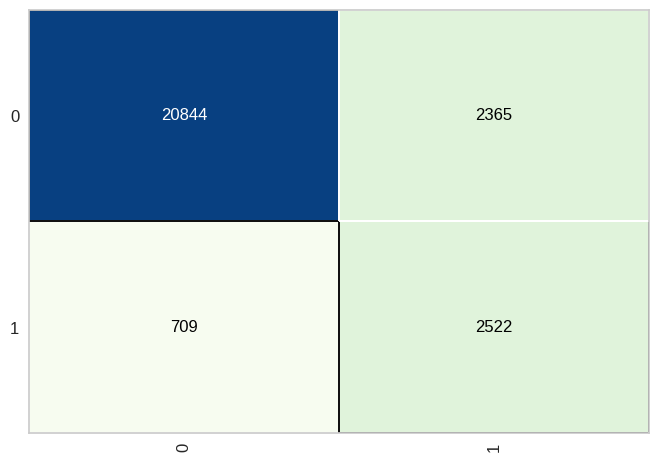

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0, 1], cmap='GnBu')
cm.fit(X_train_clean, y_train_clean)
cm.score(X_train_clean, y_train_clean)


In [ ]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train_clean, y_train_clean, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.87, 0.53 and 0.05 respectively


0.6804464654816039

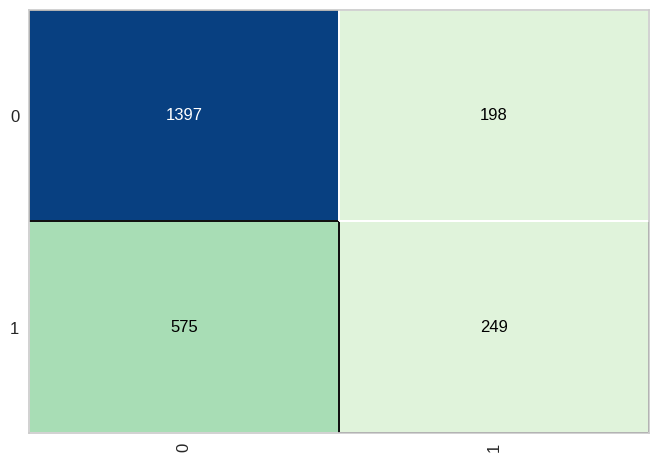

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0, 1], cmap='GnBu')
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

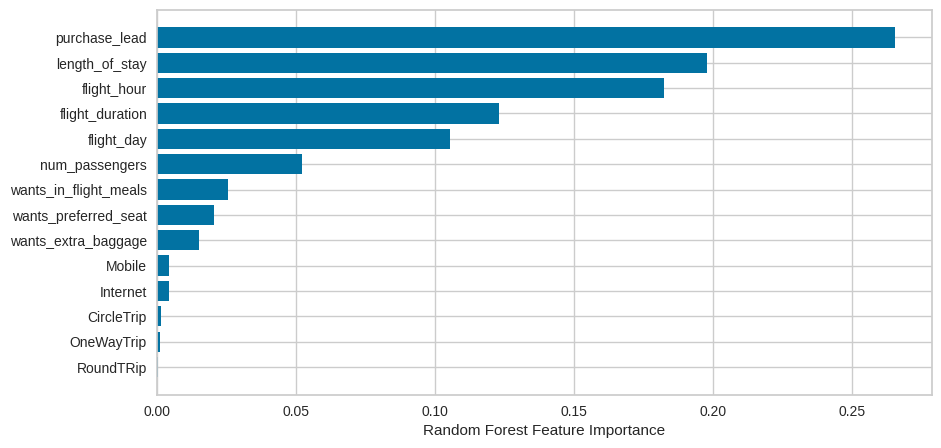

In [ ]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
scaled_df.label.value_counts()

label
0.0    28959
1.0     4092
Name: count, dtype: int64

In [ ]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [ ]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [ ]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [ ]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.599706,-0.245964,-0.779043,0.559404,0.095677,0.637844,-0.657990,-0.915370,0.896727,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
1,-0.535090,-0.187331,-0.313377,-0.725348,1.103427,0.637844,-0.657990,1.092454,0.728316,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
2,-0.535090,-0.773663,-0.365118,0.926476,0.095677,-1.567782,-0.657990,-0.915370,-1.905634,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
3,-0.535090,-0.867476,-0.028803,-0.908884,1.103427,0.637844,1.519781,1.092454,-0.053112,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
4,-0.535090,1.501303,1.497548,-1.275957,-0.408198,0.637844,-0.657990,1.092454,0.896727,-3.076706,3.076706,-0.049257,-0.098719,0.110541,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12087,0.599706,-0.832296,-0.779043,1.477084,-1.415948,0.637844,1.519781,1.092454,-1.265671,0.325023,-0.325023,-0.049257,-0.098719,0.110541,1.0
12088,-0.535090,-0.773663,0.152289,-1.459493,0.599552,0.637844,-0.657990,-0.915370,-0.053112,0.325023,-0.325023,-0.049257,-0.098719,0.110541,1.0
12089,-0.535090,-0.609490,-0.779043,-0.358276,-0.408198,-1.567782,1.519781,1.092454,-1.683331,0.325023,-0.325023,-0.049257,-0.098719,0.110541,0.0
12090,0.599706,-0.773663,-0.313377,-1.275957,1.103427,0.637844,-0.657990,-0.915370,-1.851742,0.325023,-0.325023,-0.049257,-0.098719,0.110541,1.0


In [ ]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [ ]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [ ]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)
print(acc)
print(pre)
print(recall)
print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively")

0.67
0.54
0.3
Accuracy, precision, recall and f1-score for training data are 0.67, 0.54, 0.3, 0.87 and 0.39 respectively


0.6804464654816039

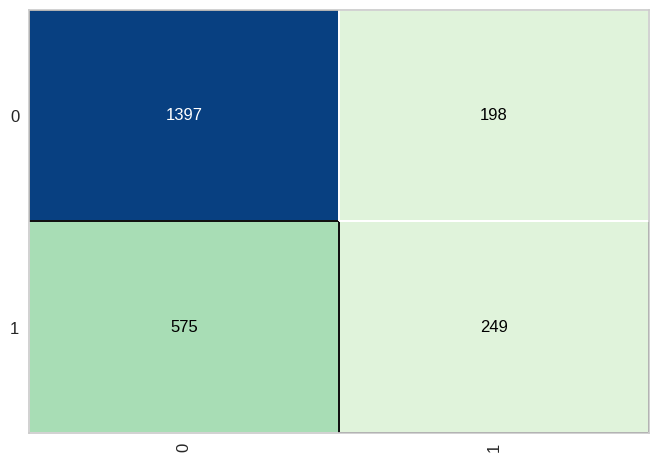

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0, 1], cmap='GnBu')
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

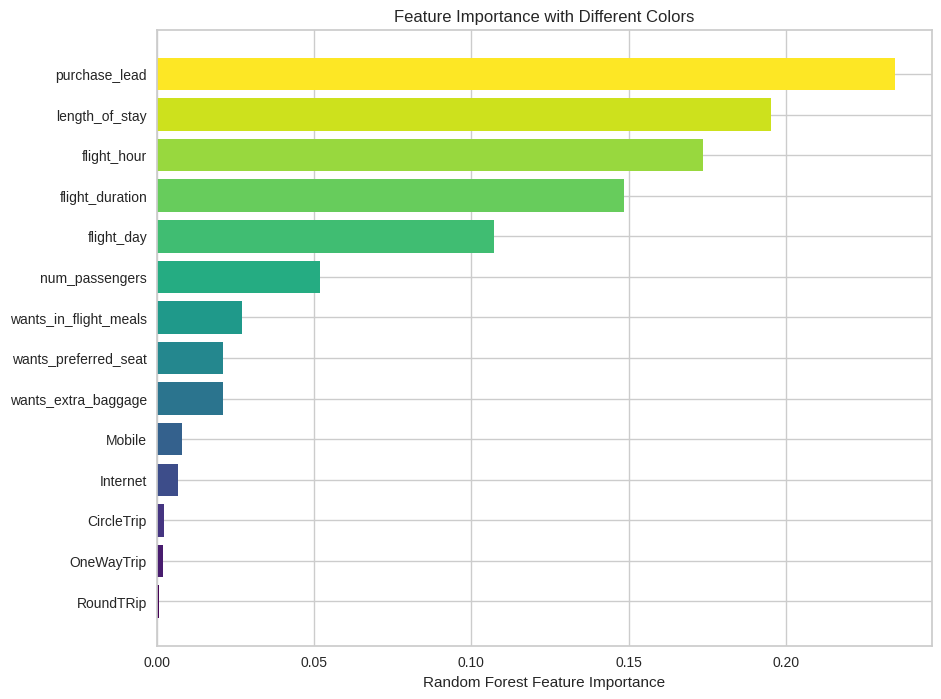

In [ ]:
# plt.figure(figsize=(10,8))
# sorted_idx = clf_rf.feature_importances_.argsort()
# plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")
plt.figure(figsize=(10, 8))
sorted_idx = clf_rf.feature_importances_.argsort()

# Generate a list of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx], color=colors)
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance with Different Colors")
plt.show()